#### Sami Adham -- Data Analysis (Project 2)

# Project: Investigate a Dataset of Profitability of Movies Industry over the years

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 The dataset was taken from the movie database (TMDB) it is like a movies hub of all the movies over the years with all information about each move. In this analysis we will analyze the profitability of file industry over the years. and to do that we will focus on the following.
   * Revenue
   * Budget or Cost
   * Profit
   * Genre
   * Release_Date
   * Release_Year
   * Title od Movies

We want to understand is film industry is profitable or not.if yes, where can I suggest to invest your money. 


## <h >Questions</h>

   1. Highst and lowest revenue
   2. highst and lowest budget 
   3. highst and lowest net profit 
   4. longest and shortest runtime 
   5. What is an average runtime
   6. What is an average profit
   7. What is an average revenue
   8. What is an average budget
   9. relationship between profit and budget over the years(ROI)
   10. Top genres over the years
   11. Top cast over the years
    
   

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

#import all libararies that you gonna use in the project
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#read TMDB file using pandas
tmdb=pd.read_csv('tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Data Cleaning 

In [3]:
#assess the data of movies
tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

1-Removing Unused features

In [4]:
#1-Removing Unused features
del_column=['id', 'imdb_id', 'popularity' ,'homepage','keywords','homepage','production_companies','vote_count','vote_average','budget_adj','revenue_adj']


tmdb=tmdb.drop(del_column,axis=1)
print('There is {} Column in the TMDB'.format(len(tmdb.columns)))
tmdb.head()

There is 11 Column in the TMDB


,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2015


2- Remove zero's and nan from data as we need it.
There is no revenue or budget = 0

In [5]:
tmdb['budget']=tmdb['budget'].replace(0,np.NAN)
tmdb['revenue']=tmdb['revenue'].replace(0,np.NAN)
tmdb.dropna(inplace=True)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 10848
Data columns (total 11 columns):
budget            3573 non-null float64
revenue           3573 non-null float64
original_title    3573 non-null object
cast              3573 non-null object
director          3573 non-null object
tagline           3573 non-null object
overview          3573 non-null object
runtime           3573 non-null int64
genres            3573 non-null object
release_date      3573 non-null object
release_year      3573 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 335.0+ KB


In [6]:
#3.1- chech duplicate 
print('There is {} duplicated rows in the TMDB'.format(sum(tmdb.duplicated())))

There is 1 duplicated rows in the TMDB


In [7]:
#3.2  We need to remove duplicated row by using drop
tmdb.drop_duplicates(inplace=True)
print('There is {} duplicated rows in the TMDB'.format(sum(tmdb.duplicated())))

There is 0 duplicated rows in the TMDB


4- change data type and format

In [8]:
#4- change data type and format
tmdb['release_date']=pd.to_datetime(tmdb['release_date'])

# change datat type of rev budj
tmdb['budget']=tmdb['budget'].apply(np.int64)
tmdb['revenue']=tmdb['revenue'].apply(np.int64)
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 10848
Data columns (total 11 columns):
budget            3572 non-null int64
revenue           3572 non-null int64
original_title    3572 non-null object
cast              3572 non-null object
director          3572 non-null object
tagline           3572 non-null object
overview          3572 non-null object
runtime           3572 non-null int64
genres            3572 non-null object
release_date      3572 non-null datetime64[ns]
release_year      3572 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 334.9+ KB


In [9]:
tmdb.head()

,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 ( highst and lowest revenue)

<h4>Since we will use highest and lowest code for many columns we want to create definition

In [10]:
def calc(coldata):
    
    #find the highest value index in the column
    hindex=tmdb[coldata].idxmax()
    lindex=tmdb[coldata].idxmin()
    #then plug it into extraction row information [highest=pd.DataFrame()]
    highest=pd.DataFrame(tmdb.loc[hindex])
    lowest=pd.DataFrame(tmdb.loc[lindex])
    output=pd.concat([highest,lowest],axis=1)
    return output


In [11]:
calc('revenue')


,1386,8142
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
overview,"In the 22nd century, a paraplegic Marine is di...","Both dumped by their girlfriends, two best fri..."
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy
release_date,2009-12-10 00:00:00,1995-10-20 00:00:00


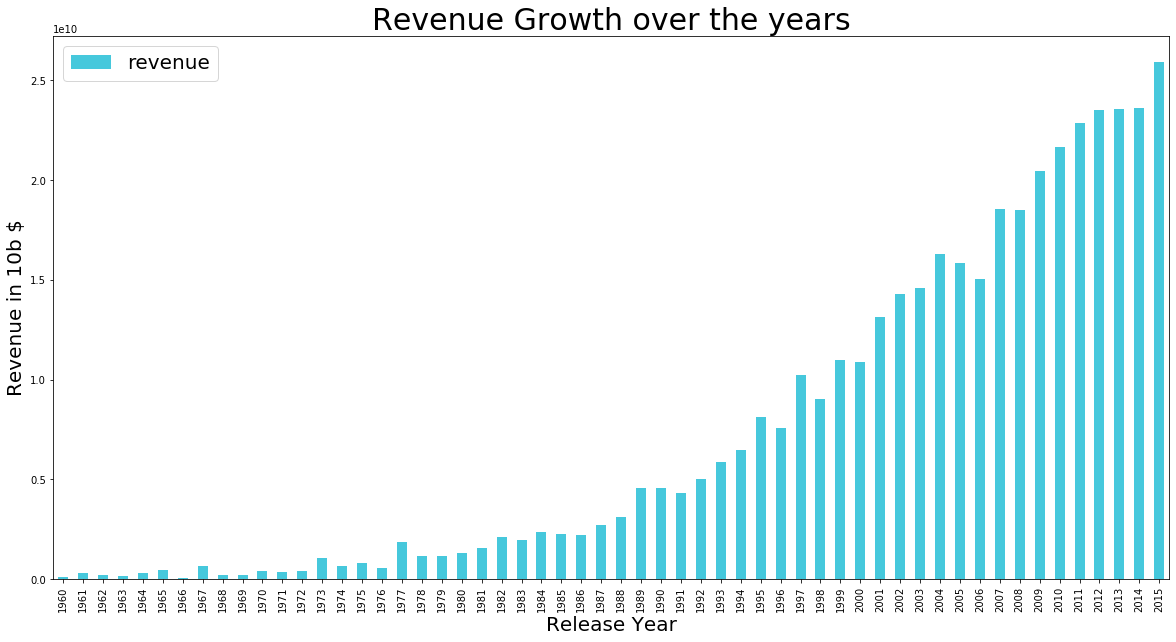

In [12]:
rcount=tmdb.groupby('release_year')['revenue'].sum()
plt.figure(figsize=(20,10))
rcount.plot(kind='bar',color='#46C8DC')
plt.ylabel('Revenue in 10b $',fontsize=(20))
plt.xlabel('Release Year',fontsize=(20))
plt.legend(fontsize=(20))
plt.title('Revenue Growth over the years',fontsize=(30));


This graph will show you the increse of revenue over the years but this not garentee that business is proftable yet.
There is many factors can explain that increase such as currency exchange.
so we have to see other features in dataset such as cost and profit

### Research Question 2 ( highst and lowest budget)

In [13]:
calc('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
overview,An Asian assassin (Dong-gun Jang) is forced to...,A comedy about finding your true love at any p...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


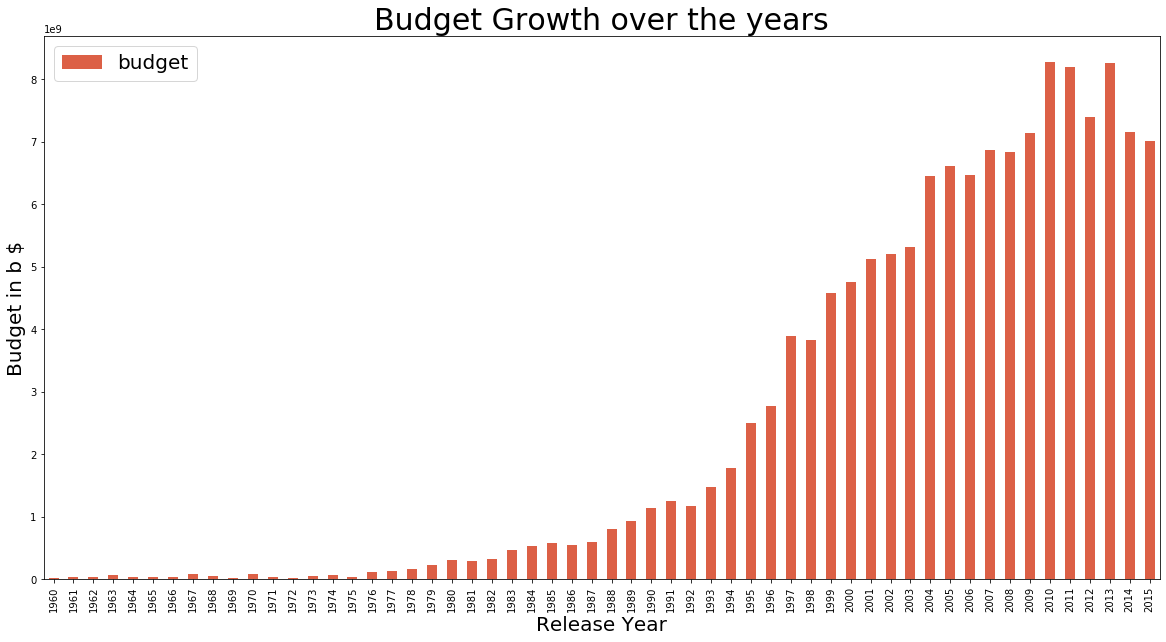

In [14]:
rcount=tmdb.groupby('release_year')['budget'].sum()
plt.figure(figsize=(20,10))
rcount.plot(kind='bar',color='#DC6046')
plt.ylabel('Budget in b $',fontsize=(20))
plt.xlabel('Release Year',fontsize=(20))
plt.legend(fontsize=(20))
plt.title('Budget Growth over the years',fontsize=(30));

This graph will show you the increse of budget over the years but this there is stability then dcrese since 2012 which good. 
so we have to see other features in dataset such as profit

### Research Question 3 ( highst and lowest profit)


<h4>We need to add profit to our dataset

In [15]:
tmdb['profit']=tmdb['revenue']-tmdb['budget']

In [16]:
calc('profit')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
overview,"In the 22nd century, a paraplegic Marine is di...",An Asian assassin (Dong-gun Jang) is forced to...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


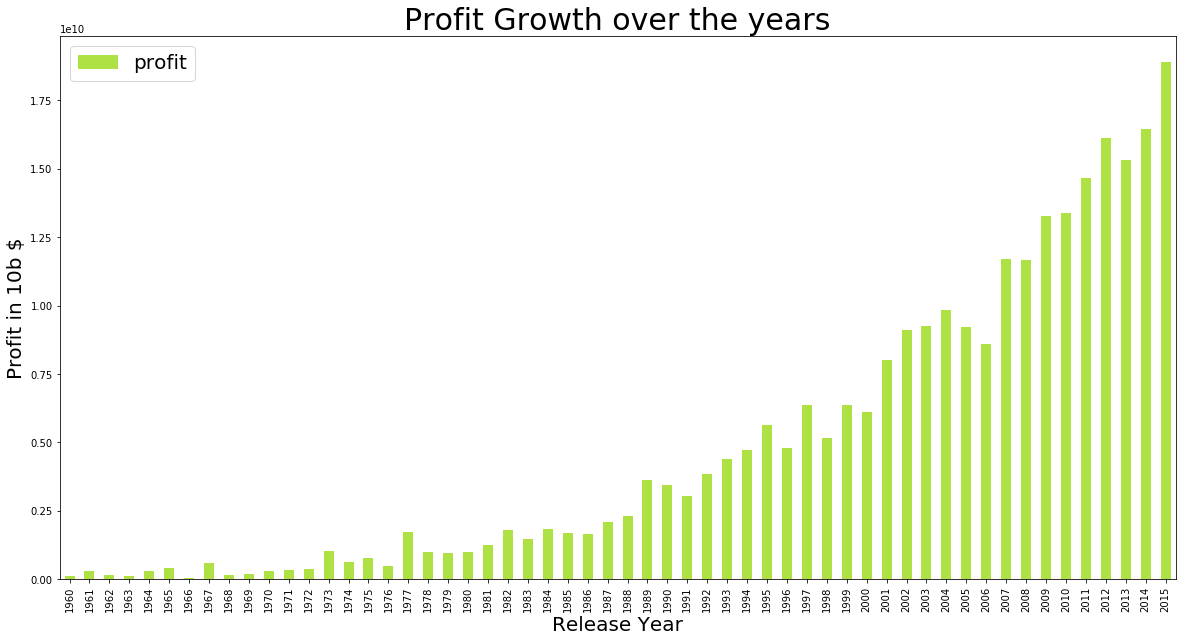

In [17]:
rcount=tmdb.groupby('release_year')['profit'].sum()
plt.figure(figsize=(20,10))
rcount.plot(kind='bar',color='#AEE143')
plt.ylabel('Profit in 10b $',fontsize=(20))
plt.xlabel('Release Year',fontsize=(20))
plt.legend(fontsize=(20))
plt.title('Profit Growth over the years',fontsize=(30));


Profit the most important factor in our analysis to see if file industry is profitable or not. but profit by it self can not show the empact of business growth by it self. we need to see the relationship between profit and cost. as well. as we going to explan in question 9

### Research Question 4( longest and shortest runtime)

In [18]:
calc('runtime')

,2107,8005
budget,18000000,3000000
revenue,871279,21000000
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
overview,"The story of Venezuelan revolutionary, Ilich R...",It is an adaptation of the Charles Dickens cla...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation
release_date,2010-05-19 00:00:00,1983-10-19 00:00:00


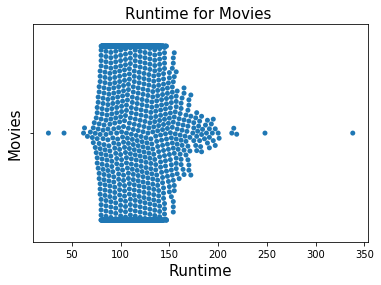

In [19]:
plt.figure()
sns.swarmplot(tmdb['runtime'])
plt.ylabel('Movies',fontsize=(15))
plt.xlabel('Runtime',fontsize=(15))

plt.title('Runtime for Movies ',fontsize=(15))

plt.show()

This Swarmplot will show you the spred of movies with runtime 

In [20]:
tmdb['runtime'].describe()


count    3572.000000
mean      109.122900
std        19.686816
min        26.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Research Question 5 ( What is an average runtime)

In [22]:
x=tmdb['runtime'].mean()
print('The average of runtime is {}'.format(x))

The average of runtime is 109.12290033594626


### Research Question 6 ( What is an average Profit )

In [23]:
x=tmdb['profit'].mean()
print('The average of runtime is {}'.format(x))

The average of runtime is 75118992.06159015


### Research Question 7 ( What is an average Revenue)

In [24]:
x=tmdb['revenue'].mean()
print('The average of runtime is {}'.format(x))

The average of runtime is 113833739.16573349


### Research Question 8 ( What is an average Budget)

In [25]:
x=tmdb['budget'].mean()
print('The average of runtime is {}'.format(x))

The average of runtime is 38714747.10414334


### Research Question 9 ( relationship between profit and budget over the years(ROI))


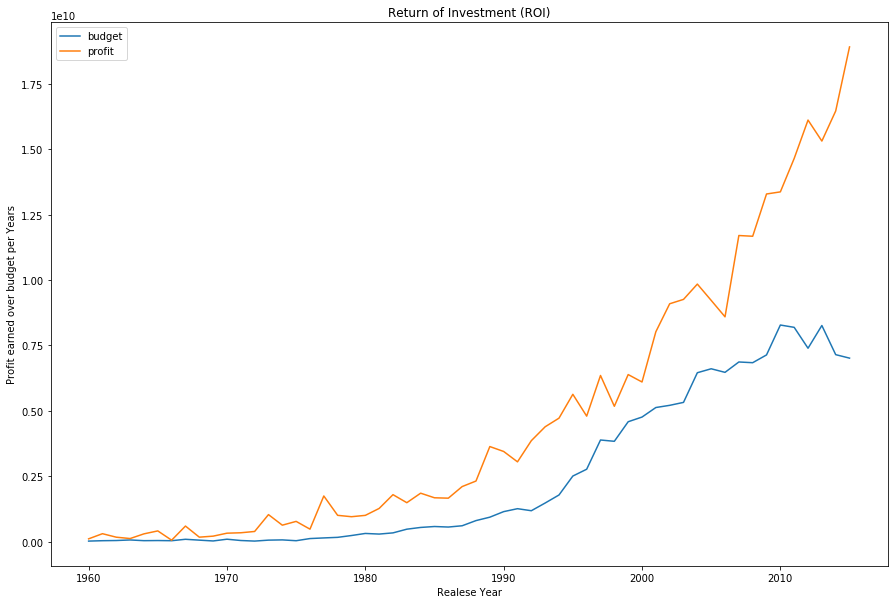

In [26]:
# Draw relationship

plt.figure(figsize=(15,10))
rev_data=tmdb.groupby('release_year')['revenue'].sum()
budj_data=tmdb.groupby('release_year')['budget'].sum()
prof_data=tmdb.groupby('release_year')['profit'].sum()
#plt.plot(rev_data,label='Revenue')
plt.plot(budj_data,label='budget')
plt.plot(prof_data,label='profit')

plt.legend()
plt.title('Return of Investment (ROI)')
plt.xlabel('Realese Year')
plt.ylabel('Profit earned over budget per Years');
#plt.plot(tmdb['budget'],tmdb['release_date'],label='budget')
#plt.plot(tmdb['profit'],tmdb['release_date'],label='budget')

### From last figure we clearly see the return of investment gap was increase over the years.
#### Findings:
2. The increase of profit or busdget by itself does not indicate proftability.
     * It might be becouse of inflation rate over the years
     * Currency Exchange data is not provided in dataset
1. The __gap__ between budget and profit was increased Significantly over the years that is good indicator that business is proftable and that becouse of many factors such as:
     * Cost Management (ex: Use technology to save money)
     * Revenue management(pricing strategy,Ancillary Rev )
     * Better Marketing Management

### Research Question 10 ( Top genres over the years)

In [27]:
#We need to consider removing any movies revenue less than 40,000,000 $
clean_data=tmdb
clean_data=tmdb[tmdb['revenue']>= 40000000]
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 10762
Data columns (total 12 columns):
budget            1987 non-null int64
revenue           1987 non-null int64
original_title    1987 non-null object
cast              1987 non-null object
director          1987 non-null object
tagline           1987 non-null object
overview          1987 non-null object
runtime           1987 non-null int64
genres            1987 non-null object
release_date      1987 non-null datetime64[ns]
release_year      1987 non-null int64
profit            1987 non-null int64
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 201.8+ KB


In [28]:
#Most proftable Genra and Top actors as well funtcion

def most(x):
    data=clean_data[x].str.cat(sep='|')
    data=pd.Series(data.split('|'))
    count=data.value_counts(ascending=False)
    
    return count

#recall the function for Genra
mostgenras=most('genres').head(10)
mostgenras


Drama              760
Comedy             707
Action             688
Thriller           630
Adventure          521
Crime              328
Romance            309
Science Fiction    304
Family             298
Fantasy            265
dtype: int64

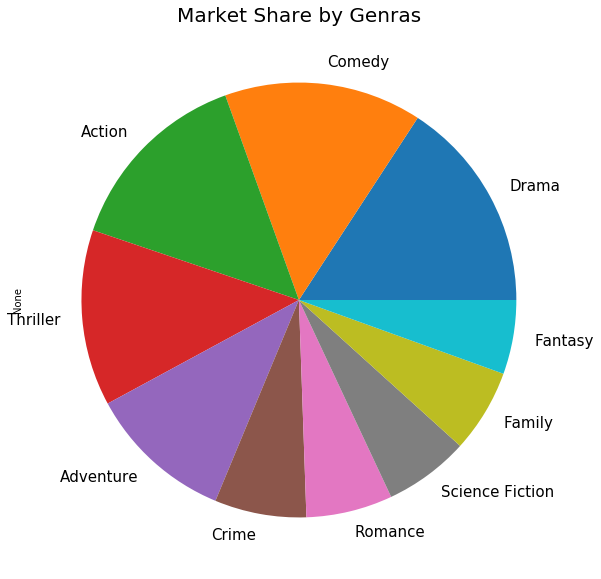

In [32]:
plt.figure(figsize=(10,10))
genra_chart=mostgenras.plot.pie(fontsize=15)
plt.title('Market Share by Genras',fontsize=20);


This show you the marketshare for each genra

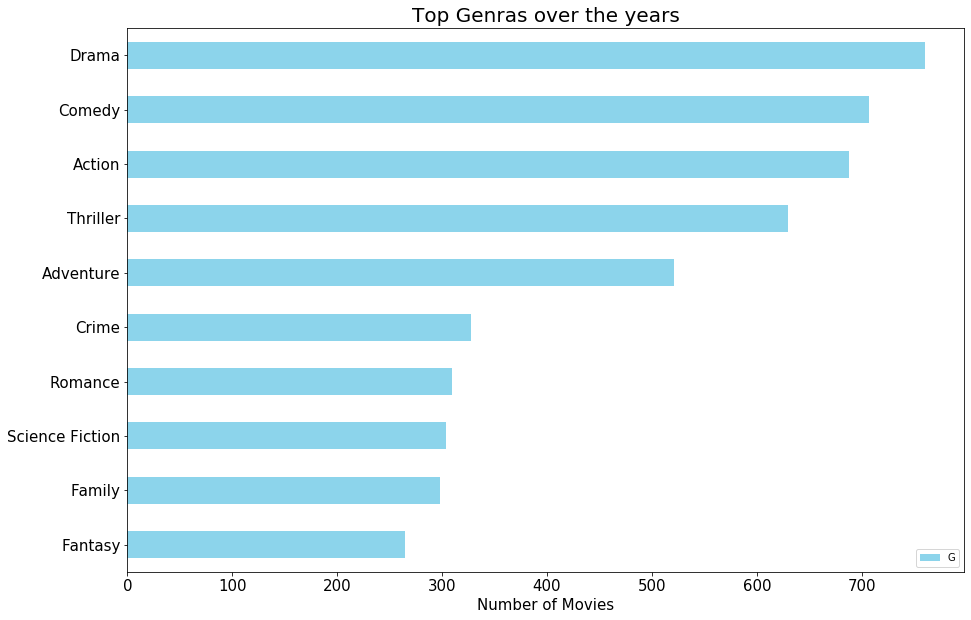

In [33]:
plt.figure(figsize=(15,10))
genra_chart=mostgenras.plot.barh(fontsize=15,color='#8cd4eb')
plt.gca().invert_yaxis()
plt.title('Top Genras over the years',fontsize=(20));
plt.xlabel('Number of Movies',fontsize=(15))
plt.legend('Genras');

#### This show you another way of the marketshare for each genra

### Research Question 11 ( Top cast over the years)

In [34]:
mostcast=most('cast').head(10)
mostcast

Robert De Niro        33
Bruce Willis          32
Tom Cruise            31
Brad Pitt             28
Tom Hanks             28
Samuel L. Jackson     28
Sylvester Stallone    26
Robin Williams        26
Eddie Murphy          26
Johnny Depp           25
dtype: int64

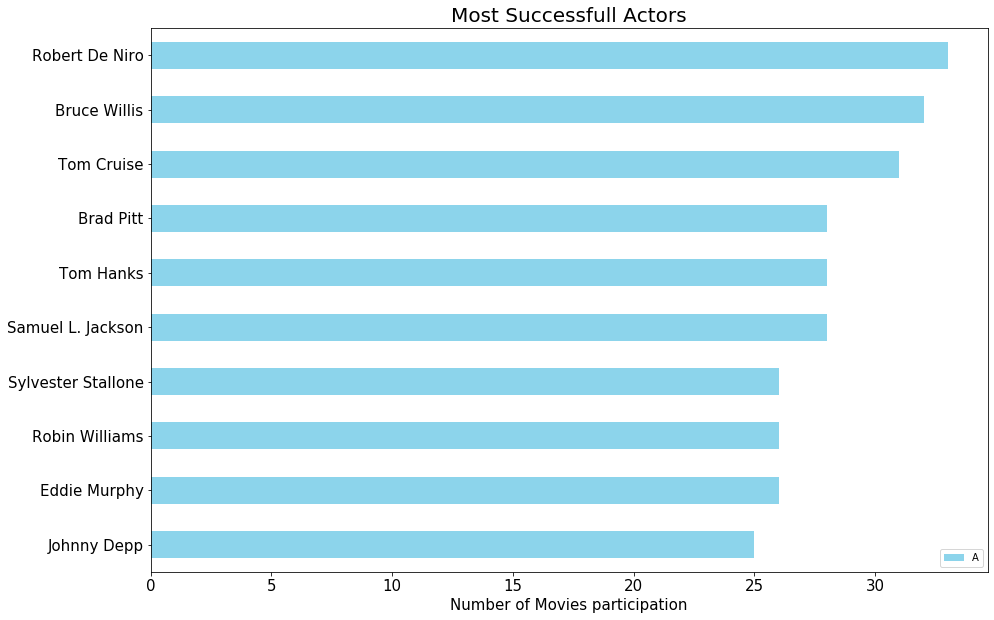

In [35]:
plt.figure(figsize=(15,10))
cast_chart=mostcast.plot.barh(fontsize=15,color='#8cd4eb')
plt.gca().invert_yaxis()
plt.title('Most Successfull Actors',fontsize=(20));
plt.xlabel('Number of Movies participation',fontsize=(15))
plt.legend('Actors');


#### This grapg is to show you visulization of the most successfull actors in dataset over the years.

<a id='conclusions'></a>
## Conclusions



#### Findings:
   1. Revenue could not ever be 0's so we need to remove it
   2.  The most movies that generate revenue is 'Avatar' and lowest is 'Mallrats'
   3.  The most movies that cost high budget is 'The Warrior's Way' and lowest is 'Lost & Found'
   4.  The most movies that is profitable ! over the years is 'Avatar' and lowest is 'The Warrior's Way'
   5. The longest runtime movies was 'Carlos' and shortest movies is 'Mickey's Christmas Carol'
   6. Averages:
      * Average runtime is: (109.12290033594626)
      * verage profit is: (75,118,992.06)
      * Average revenue is: (113,833,739.16)
      * Average budget is: (38,714,747.10)
   7. Top 5 Genres are:
      * Drama
      * Comedy
      * Thriller
      * Action
      * Adventure
   8. Top 5 most successful cast are:
      * Robert De Niro
      * Samuel L. Jackson
      * Nicolas Cage
      * Matt Damon
      * Tom Hanks
        
#### Conclusion and Opinion :
   1.	The Return of investment (ROI) in the last 15 years increased significantly as shown in the ROI graph.
   2.	At the beginning of Movies industry, the business was struggled maybe that because of lack of technology and using costly materials to create scenes.
   3.	Around 2009 the cost become stable and start to decreased (Technology in film making become easier and cheaper)
   4.	In genres section we exclude immature file maker to get better top genres by remove all movies with revenue less or equal to 40M $.

#### Limitations:
   1. In revenue and budget data I find some number which is imposable such as revenue 5 dollars .It would be better to understand some hint about these number to take decision should i delete it or leave it.
   2. In case we exclude low revenue movie the genres will change and that will affect our descision which is where should i invest my money.
   3. Currency exchange rate is not considered at this dataset regarding revenue and budget.
   